#Question 1, 2, 3, 4, 5

In [ ]:
import numpy as np
import copy

In [ ]:
class Matrix:
  def __init__(self, m, n):
    self.dim = [m, n]
    self.matrix = np.zeros((m,n), dtype=np.float64)
  def __getitem__(self, l):
    return self.matrix[l]
  def __setitem__(self, l, val):
    self.matrix[l] = val
  def toEye(self):
    self.matrix = np.eye(self.matrix.shape[0], self.matrix.shape[1])
  def toOne(self):
    self.matrix = np.ones(self.matrix.shape)
  def randomize(self):
    self.matrix = np.random.rand(self.matrix.shape[0], self.matrix.shape[1])
  def t(self):
    return Matrix(self.matrix.T.shape[0], self.matrix.T.shape[1]).fromNumpyArray(self.matrix.T)
  def fromNumpyArray(self, array):
    self.matrix = array
    return self
  def __str__(self):
    str_out = f"A {self.dim[0]} x {self.dim[1]} matrix with entries:\n"
    for i in range(self.dim[0]):
      for j in range(self.dim[1]):
        str_out += f"{self.matrix[i,j]}"
        if j != self.dim[1]-1:
          str_out += ","
        else:
          str_out += "\n"
    return str_out

  def __add__(self, other):
    if self.matrix.shape != other.matrix.shape:
      raise Exception("Matrix dimension mismatch")
    result = Matrix(self.matrix.shape[0], self.matrix.shape[1])
    result.fromNumpyArray(self.matrix + other.matrix)
    return result

  def __sub__(self, other):
    if self.matrix.shape != other.matrix.shape:
      raise Exception("Matrix dimension mismatch")
    result = Matrix(self.matrix.shape[0], self.matrix.shape[1])
    result.fromNumpyArray(self.matrix - other.matrix)
    return result

  def __mul__(self, other):
    if isinstance(other, Matrix):
      if self.matrix.shape[1] != other.matrix.shape[0]:
        raise Exception("Matrix dimension mismatch")
      result = Matrix(self.matrix.shape[0], other.matrix.shape[1])
      result.fromNumpyArray(np.dot(self.matrix, other.matrix))
      return result
    elif isinstance(other, (int, float)):
      result = Matrix(self.matrix.shape[0], self.matrix.shape[1])
      result.fromNumpyArray(self.matrix * other)
      return result

  __rmul__ = __mul__

  def norm(self, p):
    return np.linalg.norm(self.matrix, ord=p)

  # def solvezero(self):
  #   if self.matrix.shape[0] < self.matrix.shape[1]:
  #     #make the new matrix

  #     new_matrix = np.hstack((self.matrix, np.ones((self.matrix.shape[0], self.matrix.shape[1] - self.matrix.shape[0]))))
  #     _, r = np.linalg.qr(new_matrix)
  #     if r.shape[1] < r.shape[0]:
  #       raise Exception("Matrix does not have full rank")
  #     return Matrix(r.shape[1], 1).fromNumpyArray(np.linalg.solve(r, np.zeros(r.shape[1])).reshape(-1, 1))
  #   else:
  #     _, r = np.linalg.qr(self.matrix)
  #     if r.shape[1] < r.shape[0]:
  #       raise Exception("Matrix does not have full rank")
  #     return Matrix(r.shape[1], 1).fromNumpyArray(np.linalg.solve(r, np.zeros(r.shape[1])).reshape(-1, 1))

  # def solvezero(self):
  #       if self.matrix.shape[0] < self.matrix.shape[1]:
  #           new_matrix = np.hstack((self.matrix, np.ones((self.matrix.shape[0], self.matrix.shape[1] - self.matrix.shape[0]))))
  #           solution = np.linalg.lstsq(new_matrix, np.zeros(new_matrix.shape[0]), rcond=None)[0]
  #           return Matrix(self.matrix.shape[1], 1).fromNumpyArray(solution.reshape(-1, 1))
  #       else:
  #           solution = np.linalg.lstsq(self.matrix, np.zeros(self.matrix.shape[0]), rcond=None)[0]
  #           return Matrix(self.matrix.shape[1], 1).fromNumpyArray(solution.reshape(-1, 1))

  def solvezero(self):
    if self.matrix.shape[0] < self.matrix.shape[1]:
      new_b = np.zeros(self.matrix.shape[0])
      min_dim = min(self.dim)
      #print(f"min_dim is {min_dim}")
      for i in range(self.dim[0]):
        for j in range(self.dim[1]):
          if j>=min_dim:
            new_b[i] -= self.matrix[i,j]
      new_matrix = np.zeros([self.matrix.shape[0],self.matrix.shape[0]])
      for i in range(self.dim[0]):
        for j in range(self.dim[1]):
          if j>=min_dim:
            continue
          else:
            new_matrix[i,j] = self.matrix[i,j]
      #print("new matrix")
      #print(new_matrix)
      #print("new_b")
      #print(new_b)
      q, r = np.linalg.qr(new_matrix)
      #b = np.zeros(q.shape[0])
      b_m = Matrix(1, new_b.shape[0]).fromNumpyArray(new_b)
      q_t = Matrix(q.shape[1], q.shape[0]).fromNumpyArray(q.T)
      if r.shape[0] > r.shape[1]:
        raise Exception("Matrix does not have a full rank or sm")
      #print(r.shape)
      #print("ans")
      #print((np.linalg.solve(new_matrix, new_b)).reshape(-1, 1))
      ans = (np.linalg.solve(new_matrix, new_b)).reshape(-1, 1)
      #print(ans.shape[0])
      idk_list = []
      for i in range(self.matrix.shape[1]-ans.shape[0]):
        idk_list.append(1)
      #print(idk_list)
      ans = np.append(ans, np.array(idk_list))
      #print(self.matrix.shape[1])
      #print(ans.reshape(-1,1))
      return Matrix(ans.shape[0], 1).fromNumpyArray(ans.reshape(-1,1))
    else:
      q, r = np.linalg.qr(self.matrix)
      b = np.zeros(q.shape[0])
      b_m = Matrix(1, b.shape[0]).fromNumpyArray(b)
      q_t = Matrix(q.shape[1], q.shape[0]).fromNumpyArray(q.T)
      #rhs = q_t*b_m
      if r.shape[0] > r.shape[1]:
        raise Exception("Matrix does not have a full rank or sm")
      return Matrix(r.shape[1], 1).fromNumpyArray(np.linalg.solve(r, np.zeros(r.shape[1])).reshape(-1, 1))
      # res = np.linalg.solve(r, rhs.matrix)
      # return res
  def dominantEigen(self):
    x = np.random.rand(self.matrix.shape[1], 1)
    for _ in range(100):
      x = np.dot(self.matrix, x)
      x = x / np.linalg.norm(x)
    eigenvalue = np.dot(np.dot(x.T, self.matrix), x)
    return eigenvalue[0][0], Matrix(x.shape[0], x.shape[1]).fromNumpyArray(x)

  def power_method(self, matrix):
    x = np.random.rand(matrix.shape[1], 1)
    for _ in range(100):
      x = np.dot(matrix, x)
      x = x / np.linalg.norm(x)
    eigenvalue = np.dot(np.dot(x.T, matrix), x)
    return eigenvalue[0][0], x

  # def deflate(self):
  #   eigenvalues = []
  #   eigenvectors = []

  #   while self.matrix.shape[0] > 1:
  #     eigenvalue, eigenvector = self.power_method()

  #     eigenvalues.append(eigenvalue)
  #     eigenvectors.append(eigenvector)

  #     self.matrix = self.matrix - eigenvalue * np.dot(eigenvector, eigenvector.T)

  #   eigenvalues.append(0)
  #   eigenvectors.append(np.eye(self.matrix.shape[0])[:, -1].reshape(-1, 1))

  #   return eigenvalues, eigenvectors

  def deflate(self, max_iterations=10000, threshold=1e-6):
    matrix_copy = self.matrix.copy()
    eigenvalues = []
    eigenvectors = []

    for _ in range(max_iterations):
      if np.linalg.norm(matrix_copy) < threshold:
        break

      eigenvalue, eigenvector = self.power_method(matrix_copy)

      eigenvalues.append(eigenvalue)
      eigenvectors.append(eigenvector)

      matrix_copy = matrix_copy - eigenvalue * np.dot(eigenvector, eigenvector.T)

      if len(set(eigenvalues)) < len(eigenvalues):
        break

    zero_count = matrix_copy.shape[0] - len(eigenvalues)
    eigenvalues.extend([0] * zero_count)
    eigenvectors.extend([np.eye(matrix_copy.shape[0])[:, -i].reshape(-1, 1) for i in range(1, zero_count + 1)])

    return eigenvalues, eigenvectors

  def qr_algorithm(self, max_iterations=100, threshold=1e-6):
        A = self.matrix.copy()

        for _ in range(max_iterations):
            Q, R = np.linalg.qr(A)

            A = np.dot(R, Q)

            # Check convergence
            off_diag_sum = np.sum(np.abs(A - np.diag(np.diag(A))))
            if off_diag_sum < threshold:
                break

        eigenvalues = np.diag(A)
        return eigenvalues

  def solve_eigenvectors(self, eigenvalues):
        n = self.matrix.shape[0]
        eigenvectors = []

        for eigval in eigenvalues:
            A_minus_lambda_I = self.matrix - eigval * np.eye(n)
            try:
                eigenvector = np.linalg.solve(A_minus_lambda_I, np.zeros(n))
                eigenvector = eigenvector / np.linalg.norm(eigenvector)
            except np.linalg.LinAlgError:
                eigenvector = np.zeros(n)
            eigenvectors.append(eigenvector.reshape(-1, 1))

        return eigenvectors

  def qreig(self, max_iterations=100, threshold=1e-6):   #always returns null eigenvectors
        eigenvalues = self.qr_algorithm(max_iterations, threshold)
        eigenvectors = self.solve_eigenvectors(eigenvalues)
        return eigenvalues, eigenvectors

  def svd(self):
        m, n = self.matrix.shape

        # Step 1: Compute A^T * A
        ATA = np.dot(self.matrix.T, self.matrix)

        # Step 2: Compute eigenvectors and eigenvalues of A^T * A
        eigenvalues, V = np.linalg.eigh(ATA)

        # Step 3: Compute singular values and right singular vectors
        s = np.sqrt(np.maximum(eigenvalues, 0))
        nonzero_indices = np.where(s > 1e-10)[0]
        s = s[nonzero_indices]
        V = V[:, nonzero_indices]
        Vt = V.T

        # Step 4: Compute U
        U = np.dot(self.matrix, V) / s

        return Matrix(U.shape[0], U.shape[1]).fromNumpyArray(U), Matrix(len(s), 1).fromNumpyArray(s), Matrix(Vt.shape[0], Vt.shape[1]).fromNumpyArray(Vt)


In [ ]:
m = Matrix(3, 4); m.randomize(); u, s, v = m.svd()
print(u * u.t())
print(s)
print(v * v.t())
print(m)
print(u * s * v.t())

A 3 x 3 matrix with entries:
1.0000000000000007,2.2162466305064968e-16,1.503963900093598e-16
2.2162466305064968e-16,0.9999999999999998,-4.26011157474788e-16
1.503963900093598e-16,-4.26011157474788e-16,1.0



IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [ ]:
# Test case
m = Matrix(5, 5)
m[0,0] = 2; m[1,1] = 3; m[2,2] = 2
#m = m + m.t()
print(m)
e, v = m.qreig()
print(e)
print(v) # v[:,i] is the eigenvector for eigenvalue e[i,0]
print(np.linalg.eig(m.matrix))

In [ ]:
demoa = [[-2.98085626,1.04168142,0.98886631,0.22310307],
 [ 1.04168142,-2.37934902,0.76703755,1.07485722],
 [ 0.98886631,0.76703755,-2.19541932,0.96974262],
 [ 0.22310307,1.07485722,0.96974262,-2.92893444]]
demob = np.zeros(4)
checkmat = np.linalg.lstsq(demoa, demob)[0]
print(checkmat)

In [ ]:
m = Matrix(5, 5)
m[0,0] = 2; m[1,1] = 3; m[2,2] = 2
# print(m.matrix)
e, v = m.deflate()
print("e")
print(e)
print("v")
print(v) # v[:,i] is the eigenvector for eigenvalue e[i,0]
print("np")
print(np.linalg.eig(m.matrix))
# print(m.matrix)
# print(np.linalg.eig([[2, 0, 0, 0, 0],[0, 3, 0, 0, 0],[0, 0, 2, 0, 0],[0, 0, 0, 0, 0],[0, 0, 0, 0, 0]]))

e
[3.0, 2.0000000000000004, 2.0000000000000004, 0, 0]
v
[array([[6.31076659e-18],
       [1.00000000e+00],
       [8.27014228e-18],
       [0.00000000e+00],
       [0.00000000e+00]]), array([[ 7.37476776e-01],
       [-1.53592056e-17],
       [ 6.75372493e-01],
       [ 0.00000000e+00],
       [ 0.00000000e+00]]), array([[-6.75372493e-01],
       [-2.75537955e-18],
       [ 7.37476776e-01],
       [ 0.00000000e+00],
       [ 0.00000000e+00]]), array([[0.],
       [0.],
       [0.],
       [0.],
       [1.]]), array([[0.],
       [0.],
       [0.],
       [1.],
       [0.]])]
np
EigResult(eigenvalues=array([2., 3., 2., 0., 0.]), eigenvectors=array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]]))


In [ ]:
m = Matrix(4, 4)
m.randomize()
m = m + m.t()
e, v = m.deflate()
print("e")
print(e)
print("v")
print(v) # v[:,i] is the eigenvector for eigenvalue e[i,0]
print("np")
print(np.linalg.eig(m.matrix))

e
[3.4616357296476066, -1.1365814939438177, 0.5433403485449291, -0.15174693292087685]
v
[array([[0.40447893],
       [0.63929186],
       [0.48391214],
       [0.43992244]]), array([[ 0.34511871],
       [-0.61769169],
       [ 0.68507546],
       [-0.17326761]]), array([[ 0.73745124],
       [-0.27035325],
       [-0.53777453],
       [ 0.30638757]]), array([[ 0.41647994],
       [ 0.36969178],
       [-0.0854354 ],
       [-0.82617991]])]
np
EigResult(eigenvalues=array([ 3.46163573,  0.54334035, -1.13658149, -0.15174693]), eigenvectors=array([[-0.40447893, -0.73745124,  0.34511871, -0.41647994],
       [-0.63929186,  0.27035325, -0.61769169, -0.36969178],
       [-0.48391214,  0.53777453,  0.68507546,  0.0854354 ],
       [-0.43992244, -0.30638757, -0.17326761,  0.82617991]]))


In [ ]:
m = Matrix(2, 3)
for i in range(2):
  for j in range(3):
    m[i, j] = (i+1) + (j+1)
A = m.matrix
print(m)
print(m.solvezero())

A 2 x 3 matrix with entries:
2.0,3.0,4.0
3.0,4.0,5.0

A 3 x 1 matrix with entries:
1.0
-2.0
1.0



In [ ]:
m = Matrix(4, 3)
for i in range(4):
  for j in range(3):
    m[i, j] = (i+1) + (j+1)
print(m); print(m.solvezero())

A 4 x 3 matrix with entries:
2.0,3.0,4.0
3.0,4.0,5.0
4.0,5.0,6.0
5.0,6.0,7.0

A 3 x 1 matrix with entries:
-0.0
-0.0
0.0



In [ ]:
m = Matrix(3, 3)
for i in range(3):
  for j in range(3):
    m[i, j] = (i+1) ** (j+1)
print(m); print(m.solvezero())

A 3 x 3 matrix with entries:
1.0,1.0,1.0
2.0,4.0,8.0
3.0,9.0,27.0

A 3 x 1 matrix with entries:
-0.0
0.0
-0.0



In [ ]:
m = Matrix(3, 3)
for i in range(3):
  for j in range(3):
    m[i, j] = (i+1) ** (j+1)
print(m)
e, v = m.dominantEigen()
print(e); print(v)

A 3 x 3 matrix with entries:
1.0,1.0,1.0
2.0,4.0,8.0
3.0,9.0,27.0

29.942767464139482
A 3 x 1 matrix with entries:
0.04323030032894361
0.2974447163133834
0.9537598135121442



In [ ]:
m = Matrix(2, 3)

In [ ]:
print(m[1, 2])

0.0


In [ ]:
m[1,2] = 4
print(m[1, 2])

4.0


In [ ]:
m.toEye()

In [ ]:
m.toOne()

[[1. 1. 1.]
 [1. 1. 1.]]


In [ ]:
#q3 done

#Question 6

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import random
import networkx as nx

In [ ]:
class DirectedGraph:
  def __init__(self, numVertices=-1):
    self.maxSize = numVertices
    self.numEdges = 0
    if numVertices==-1:
      self.adjList = {}
      self.maxSize = -1
      self.numVertices = 0
    else:
      self.adjList = {}
      self.numVertices = numVertices
      for i in range(1, numVertices+1):
        self.adjList[i] = []

  def addNode(self, nodeIndex): #forgot to add negative check
    if self.maxSize != -1:
      if nodeIndex<=self.maxSize:
        self.adjList[nodeIndex] = []
      else:
        raise Exception('Node index cannot exceed number of nodes')
    else:  #free graph
      self.adjList[nodeIndex] = []
      self.numVertices += 1

  def addEdge(self, a, b):
    if a not in self.adjList.keys():
      self.addNode(a)
    if b not in self.adjList.keys():
      self.addNode(b)
    if b not in self.adjList[a]:
      self.adjList[a].append(b)
      #self.adjList[b].append(a)
      self.numEdges += 1

  def __add__(self, other):
    if type(other) is int:
      self.addNode(other)
    if type(other) is tuple:
      self.addEdge(other[0], other[1])
    return self

  def __str__(self):
    outstr= f"Graph with {self.numVertices} nodes and {self.numEdges} edges. Neighbours of the nodes are belows:\n"
    for i in self.adjList.keys():
      outstr += f"Node {i}: {self.adjList[i]}\n"
    return outstr

  def plotDegDist(self):
    node_degrees = []
    for i in range(1, self.numVertices+1):
      node_degrees.append(len(self.adjList[i]))

    node_count = {}
    # for i in range(0, max(node_degrees)+1):
    for i in range(0, self.numVertices+1):
      node_count[i] = 0
    for deg in node_degrees:
      node_count[deg] += 1
    for i in node_count.keys():
      node_count[i] /= self.numVertices
    # xplots = np.arange(0, max(node_count.keys())+1, 1)
    xplots = np.arange(0, self.numVertices, 1)
    yplots = [node_count[i] for i in xplots]
    # print(xplots)
    # print(yplots)
    plt.plot(xplots, yplots, 'o', marker='.', markersize = 5)
    plt.axvline(x = sum(node_degrees)/len(node_degrees), color = 'red', label = 'axvline - full height')
    plt.show()


  def isConnected(self):
    queue = []
    visited = []
    curr_vertex = list(self.adjList.keys())[0]
    queue.append(curr_vertex)
    while(len(queue)!=0):
      curr_vertex = queue.pop(0)
      for i in self.adjList[curr_vertex]:
        if i not in visited:
          visited.append(i)
          queue.append(i)
    if(len(visited)==self.numVertices):
      return True
    else:
      return False

  def oneTwoComponentSizes(self):
    queue = []
    visited = []
    conn_component_size = []
    temp = 0
    for vert in self.adjList.keys():
      if vert not in visited:
        flag = 0
        curr_vertex = vert
        visited.append(vert)
        queue.append(curr_vertex)
        while(len(queue)!=0):
          curr_vertex = queue.pop(0)
          #visited.append(curr_vertex)
          #print(f" adj List is {self.adjList[curr_vertex]}")
          if (len(self.adjList[curr_vertex])==0):
            flag = 1
          for i in self.adjList[curr_vertex]:
            if i not in visited:
              visited.append(i)
              queue.append(i)
        temp = len(visited) - temp
        if flag ==0:
          conn_component_size.append(temp)
        else:
          conn_component_size.append(1)
    #print(conn_component_size)
    conn_component_size.sort()
    return [conn_component_size[-1], conn_component_size[-2]]

  # def pagerank(self, df):
  #   #idk what am I doing here
  #   list_1 = [1/self.maxSize]
  #   vertical_mat = []
  #   for i in range(self.maxSize):
  #     vertical_mat.append(list_1)

  #   iter_matrix = []
  #   for i in range(self.maxSize):
  #     iter_matrix.append([])
  #     for j in range(self.maxSize):
  #       iter_matrix[-1].append(0)
  #   #print(iter_matrix)
  #   for i in self.adjList.keys():
  #     for j in self.adjList[i]:
  #       #print(f'{j}, {i}')
  #       iter_matrix[j-1][i-1] = 1
  #       #print(iter_matrix)
  #   #print(iter_matrix)

  #   nodes_woe = []
  #   for i in range(self.maxSize):
  #     if len(self.adjList[i+1]):
  #       nodes_woe.append(i+1)
  #   b = []
  #   for i in range(self.maxSize):   #making b
  #     b.append([])
  #     for j in range(self.maxSize):
  #       b[-1].append((1/self.maxSize)*(1-df))

  #   for i in range(self.maxSize):   #multiplying df to A
  #     for j in range(self.maxSize):
  #       iter_matrix[i][j] *= df

  #   m = []
  #   for i in range(self.maxSize):  #making m
  #     m.append([])
  #     for j in range(self.maxSize):
  #       m[-1].append(0)

  #   for i in range(self.maxSize):   #modifying
  #     for j in range(self.maxSize):
  #       m[i][j] += iter_matrix[i][j] + b[i][j]

  #   eig_ans = np.linalg.eig(m)

  #   #print(eig_ans)
  #   return eig_ans

    #m = df*a+(1-df)b
    #find eigenvalues of b
    # for i in range(self.maxSize):
    #   if len(self.adjList[i+1])==0:
    #     for j in range(self.maxSize):
    #       iter_matrix[j][i] = 1/self.maxSize
    # temp_mat = np.dot(iter_matrix, vertical_mat)
    # for i in range(100):
    #   temp_mat = np.dot(iter_matrix, temp_mat)

    # print(temp_mat)
    #print(self.adjList)
    #print(vertical_mat)
    #print(iter_matrix)
  def pagerank(self, damping_factor):
        # Create transition probability matrix
        n = len(self.adjList)
        transition_matrix = np.zeros((n, n))
        for i in range(n):
          num_outlinks = len(self.adjList[i+1])
          if num_outlinks == 0:  # Handle dangling nodes
              transition_matrix[:, i] = 1 / n
          else:
              for j in range(n):
                  if j+1 in self.adjList[i+1]:
                      transition_matrix[j, i] += damping_factor * (1 / num_outlinks)


        # Calculate PageRank using eigenvector corresponding to largest eigenvalue
        eigenvalues, eigenvectors = np.linalg.eig(transition_matrix)
        max_eigenvalue_idx = np.argmax(eigenvalues)
        pagerank_vector = np.abs(eigenvectors[:, max_eigenvalue_idx])
        pagerank_vector /= np.sum(pagerank_vector)  # Normalize to sum to 1

        # Visualize the graph
        G = nx.DiGraph()
        for node in self.adjList:
            G.add_node(node, size=pagerank_vector[node-1] * 1000)  # Scale the size for better visualization
        for src, dst_list in self.adjList.items():
            for dst in dst_list:
                G.add_edge(src, dst)

        # Draw the graph
        pos = nx.spring_layout(G)
        node_size = [G.nodes[node]['size'] for node in G.nodes()]
        for x in node_size:
          x = x*5
        nx.draw(G, pos, with_labels=True, node_size=node_size, node_color='skyblue', edge_color='gray', font_size=8)
        plt.show()



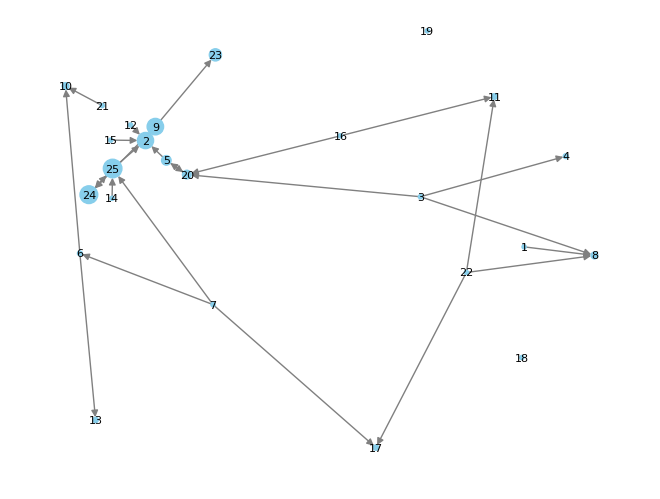

In [ ]:
# Testcase
p = 0.05
n = 25
g = DirectedGraph(n)
for i in range(n):
    for j in range(n):
        if i != j and random.random() <= p:
            g.addEdge(i+1, j+1)
g.pagerank(0.85)

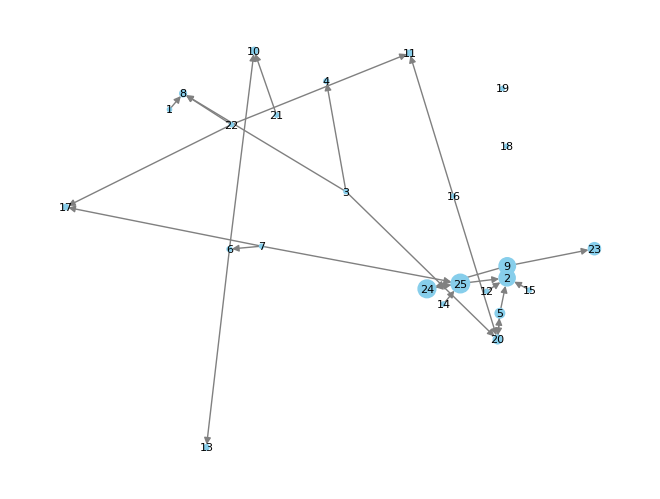

In [ ]:
g.pagerank(0.85)

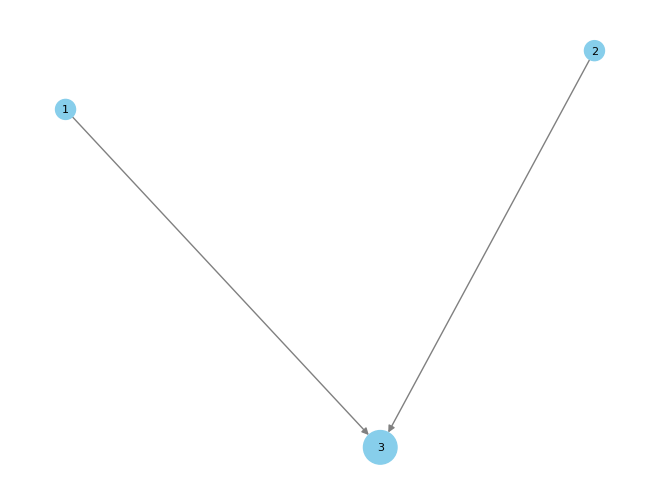

In [ ]:
g = DirectedGraph(3)
g.addEdge(1, 3)
g.addEdge(2, 3)
g.pagerank(0.85)

In [ ]:
g = DirectedGraph(10)
g.addNode(1)
g.addNode(4)
g.addEdge(1, 4)
g = g + (2, 3)
g = g + (4, 5)

In [ ]:
print(g)

Graph with 10 nodes and 3 edges. Neighbours of the nodes are belows:
Node 1: [4]
Node 2: [3]
Node 3: []
Node 4: [5]
Node 5: []
Node 6: []
Node 7: []
Node 8: []
Node 9: []
Node 10: []



Graph with 25 nodes and 33 edges. Neighbours of the nodes are belows:
Node 1: [13, 19]
Node 2: [5]
Node 3: []
Node 4: []
Node 5: [9]
Node 6: [2]
Node 7: [23]
Node 8: [6]
Node 9: []
Node 10: []
Node 11: [4, 6, 14, 15]
Node 12: [3, 10, 14, 19]
Node 13: [18, 19]
Node 14: []
Node 15: [22]
Node 16: [1, 3, 13, 24]
Node 17: [6]
Node 18: [10, 12]
Node 19: [22]
Node 20: [15]
Node 21: []
Node 22: [1, 14]
Node 23: [5, 14]
Node 24: [11, 14]
Node 25: []



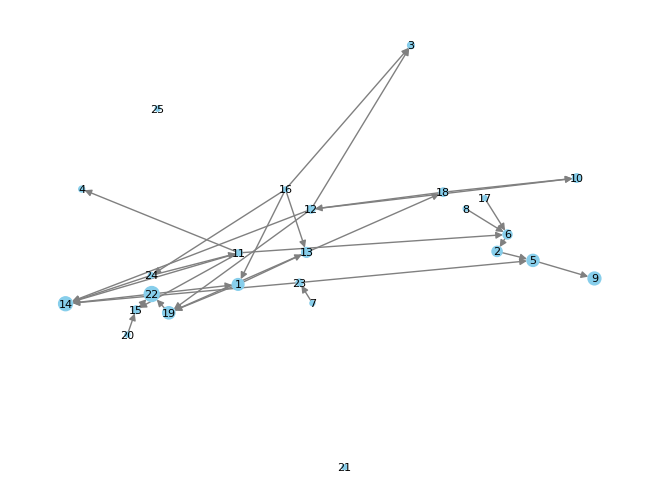

TypeError: 'NoneType' object is not subscriptable

In [ ]:
p = 0.05; n = 25
g = DirectedGraph(n)
for i in range(n):
  for j in range(n):
    if i != j and random.random() <= p:
      g.addEdge(i+1, j+1)
print(g)
ans = g.pagerank(0.85)
print(ans[0])

In [ ]:
#Random code snippets below

In [ ]:
import numpy as np
xa = range(10)
ya = range(10)
X, Y = np.meshgrid(xa, ya)
print(X)
print(Y)

[[0 1 2 3 4 5 6 7 8 9]
 [0 1 2 3 4 5 6 7 8 9]
 [0 1 2 3 4 5 6 7 8 9]
 [0 1 2 3 4 5 6 7 8 9]
 [0 1 2 3 4 5 6 7 8 9]
 [0 1 2 3 4 5 6 7 8 9]
 [0 1 2 3 4 5 6 7 8 9]
 [0 1 2 3 4 5 6 7 8 9]
 [0 1 2 3 4 5 6 7 8 9]
 [0 1 2 3 4 5 6 7 8 9]]
[[0 0 0 0 0 0 0 0 0 0]
 [1 1 1 1 1 1 1 1 1 1]
 [2 2 2 2 2 2 2 2 2 2]
 [3 3 3 3 3 3 3 3 3 3]
 [4 4 4 4 4 4 4 4 4 4]
 [5 5 5 5 5 5 5 5 5 5]
 [6 6 6 6 6 6 6 6 6 6]
 [7 7 7 7 7 7 7 7 7 7]
 [8 8 8 8 8 8 8 8 8 8]
 [9 9 9 9 9 9 9 9 9 9]]


In [ ]:
arr = [1, 2, 3, 3, 4, 5]
arr2d = [arr]
arr2d.append(arr)
print(arr[:, 1])

TypeError: list indices must be integers or slices, not tuple

In [ ]:
from sklearn.model_selection import StratifiedKFold
l = []
dummy_labels = []
for i in range(10):
  l.append(i)
  dummy_labels.append(1)
skf = StratifiedKFold(n_splits=5, shuffle=True)
skf.get_n_splits(l)
print(skf)

StratifiedKFold(n_splits=5, random_state=None, shuffle=True)


In [ ]:
for i, (train_index, test_index) in enumerate(skf.split(l, dummy_labels)):
  print(f"Fold {i}:")
  print(f"  Train: index={train_index}")
  print(f"  Test:  index={test_index}")
  if i==0:
    print(type(train_index))

Fold 0:
  Train: index=[0 1 2 3 4 5 6 8]
  Test:  index=[7 9]
<class 'numpy.ndarray'>
Fold 1:
  Train: index=[0 1 2 3 4 6 7 9]
  Test:  index=[5 8]
Fold 2:
  Train: index=[0 1 3 4 5 7 8 9]
  Test:  index=[2 6]
Fold 3:
  Train: index=[2 3 4 5 6 7 8 9]
  Test:  index=[0 1]
Fold 4:
  Train: index=[0 1 2 5 6 7 8 9]
  Test:  index=[3 4]
